#QUESTION 1: Do the years most popular movies have a correlation with the years most popular Haloween costumes?
###Hypothesis: Popular movies from that year will have a negative correlation with popular Halloween costumes. The more popular a charcater from a movie, the higher rank (lower number on rank hence negative correlation) it will have as a popular Halloween costume


---


 Last year at a Halloween party I noticed there were a significant amount of people wearing costumes influenced by movie characters. Instead off the suspected pack of zombies, there was instead a whole horde of women in Barbie costumes paying homage the Barbie(2023) movie released just the summer before. It made me wonder, "Do the years most popular movies have a significant correlation to the years popular Halloween costumes, or was the Barbie movie and bequent costumes just an odd phemonena?"



#QUESTION 2: Are the year's most popular movie characters more popular than classic Halloween costumes(Dracula, Frankestien, Witch, Mummy, etc)?

###Hypothesis: The classics are hard to beat and are more reliable than the fleeting trends of charater from movies. Classical Haloween costumes will rank higher (lower number on list) on average over popular movie characters from that year.

When I think of Halloween, I think of the quintessential classics that kids have been dressing up as for generations: The Mummy, Withcm Frankestien, and Dracula. Have these lost popularity over more modern characters found in movies?

Data Sets:

1.) Movie Data : https://www.kaggle.com/datasets/shreyasawant13/latest-movie-dataset

2.) Popular Ranked Halloween Costumes(2022-2023) : https://frightgeist.withgoogle.com/  (csv dowloaded from github)


In [1]:
import pandas as pd

In [81]:
#Metadata: See what the data from Google Trends Frightgeist looks like
costume_data = pd.read_csv('/content/20221018_HalloweenCostumes_Frightgeist.csv')
costume_data.info()
costume_data.head() #need to

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 2 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   Rankings for Halloween costumes,
Based on US searches in September 2022  865 non-null    object
 1   Unnamed: 1                                                               865 non-null    object
dtypes: object(2)
memory usage: 13.6+ KB


,"Rankings for Halloween costumes,\nBased on US searches in September 2022",Unnamed: 1
0,Costume,Ranking
1,Witch,1
2,Spider-Man,2
3,Dinosaur,3
4,Stranger Things,4


In [66]:
#Metadata: See what the data for movie looks like
movie_data = pd.read_csv('MoviesTopRated.csv')
movie_data.info()
movie_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    10000 non-null  int64  
 1   id            10000 non-null  int64  
 2   genre_ids     10000 non-null  object 
 3   title         10000 non-null  object 
 4   overview      9998 non-null   object 
 5   popularity    10000 non-null  float64
 6   release_date  10000 non-null  object 
 7   vote_average  10000 non-null  float64
 8   vote_count    10000 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 703.2+ KB


,Unnamed: 0,id,genre_ids,title,overview,popularity,release_date,vote_average,vote_count
0,0,238,"[18, 80]",The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",119.438,1972-03-14,8.7,18448
1,1,278,"[18, 80]",The Shawshank Redemption,Framed in the 1940s for the double murder of h...,90.415,1994-09-23,8.7,24376
2,2,240,"[18, 80]",The Godfather Part II,In the continuing saga of the Corleone crime f...,70.637,1974-12-20,8.6,11144
3,3,424,"[18, 36, 10752]",Schindler's List,The true story of how businessman Oskar Schind...,48.096,1993-12-15,8.6,14421
4,4,19404,"[35, 18, 10749]",Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",26.588,1995-10-20,8.6,4225


In [69]:
#Since the costume data is from 2022, lets filter the movie data to just 2022
movie_data['release_date'] = pd.to_datetime(movie_data['release_date'])
# To make things easier, making year its own column in DF
movie_data['release_year'] = movie_data['release_date'].dt.year
movies_2022 = movie_data[movie_data['release_year'] == 2022]

#arrange 2020 movies form most popular to least (The first 100 most popular movies)
top_100_2022 = movies_2022.sort_values(by='popularity', ascending=False)
top_100_2022.head(100)


,Unnamed: 0,id,genre_ids,title,overview,popularity,release_date,vote_average,vote_count,release_year
89,89,315162,"[16, 10751, 14, 12, 35, 28]",Puss in Boots: The Last Wish,Puss in Boots discovers that his passion for a...,376.284,2022-12-07,8.3,6177,2022
946,946,76600,"[878, 12, 28]",Avatar: The Way of Water,Set more than a decade after the events of the...,363.116,2022-12-14,7.7,9492,2022
1853,1853,900667,"[16, 12, 28, 14]",One Piece Film Red,Uta — the most beloved singer in the world. He...,318.199,2022-08-06,7.4,623,2022
3553,3553,787752,"[27, 53, 35]",Fresh,Frustrated by scrolling dating apps only to en...,223.627,2022-03-03,7.0,1237,2022
2631,2631,505642,"[28, 12, 878]",Black Panther: Wakanda Forever,"Queen Ramonda, Shuri, M’Baku, Okoye and the Do...",194.346,2022-11-09,7.2,5304,2022
...,...,...,...,...,...,...,...,...,...,...
2058,2058,626735,"[18, 35]",Dog,An army ranger and his dog embark on a road tr...,50.662,2022-02-17,7.3,1254,2022
7618,7618,616820,"[27, 53]",Halloween Ends,Four years after the events of Halloween in 20...,50.179,2022-10-12,6.2,1377,2022
2598,2598,593643,"[27, 53, 35]",The Menu,A young couple travels to a remote island to e...,49.732,2022-11-17,7.2,3507,2022
831,831,756999,"[27, 53]",The Black Phone,"Finney Blake, a shy but clever 13-year-old boy...",49.661,2022-06-22,7.7,4047,2022


In [83]:
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
costume_data = pd.read_csv('/content/20221018_HalloweenCostumes_Frightgeist.csv')
movie_data = pd.read_csv('/content/MoviesTopRated.csv')

In [84]:
# 1. Costume Data:  FIXING THE HEADING OF THE COSTUME DATA AND DATA TYPE
costume_data.columns = ['Costume', 'Ranking'] #fixing the headings
costume_data['Ranking'] = pd.to_numeric(costume_data['Ranking'], errors='coerce')

# 2. Movie Data : Filter movies from 2022 to match time frame of costume data
movie_data['release_date'] = pd.to_datetime(movie_data['release_date'])
movie_data = movie_data[movie_data['release_date'].dt.year.isin([2022])]


# Limit to the top 100 movies of each year based on popularity
movie_data['year'] = movie_data['release_date'].dt.year
top_movies = movie_data.loc[movie_data['year'] == 2022].nlargest(100, 'popularity')

#Extracting character names iss more difficult than anticipated, and found I can utilize some NPL to do the job: https://spacy.io/models
# Load spaCy model, this is to use a NLP to match just the proper nouns (movie characters) in the films to matching character costumes. Otherwise something like Witch will be matched even tough withc is just in the title of the movie and not a specific character
nlp = spacy.load('en_core_web_sm')

# Using th NLP I want to extract the full character names from titles. So "Doctor Strange" character doesnt get matched to "Doctor" costume, but is instead fully "Doctor Strange"
#Heavily relied on documentation for this***
def extract_character_names(text):
  doc = nlp(text)
  character_names = []
  current_name = []
  for token in doc:
    if token.pos_ == 'PROPN': #Propernoun--this tries to filter to just the character names in title's
      current_name.append(token.text)
    else:
      if current_name:
        character_names.append(' '.join(current_name).lower()) #lower case everything so no case sensitivity matches
        current_name = []
  if current_name:
      character_names.append(' '.join(current_name).lower())
  return character_names

# Use the function above to extract character names from movie titles data set
movie_keywords = {} # dictionary of keywords to match to costumes
for title in top_movies['title']:
  keywords = extract_character_names(title) #call function
  for keyword in keywords:
    if keyword in movie_keywords:
      movie_keywords[keyword].add(title)
    else:
      movie_keywords[keyword] = {title}

# I want to set aside the traditional and generic costumes and exclude them from being considered movie-related. (lowercase for case sensitivity issues)
traditional_costumes = ['vampire', 'dracula', 'frankenstein', 'zombie', 'witch', 'mummy', 'pumpkin', 'bat', 'devil', 'ghost']

# Create a function that will check if costume is movie-related by matching with exact character names. *NOTE: mak sure to exclude traditional costumes
# Design so movies are sorted into categories Boolean style --> Does it match a movie title, if so costume is True els False.
def is_movie_related(costume, movie_keywords, traditional_costumes):
    costume_lower = costume.lower() #standardize case senitivity
    if costume_lower in traditional_costumes:
      return False, [] #traditional bin/atergory
    matched_movies = []
    for word in movie_keywords:
      if word == costume_lower:
        matched_movies.extend(movie_keywords[word])
    return len(matched_movies) > 0, matched_movies

<ipython-input-84-9d914e357e8f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data['year'] = movie_data['release_date'].dt.year


Traditional Costume's Average Costume Ranking: 99.0
Match 2022 Movie-Related Costumes Average Costume Ranking: 274.125


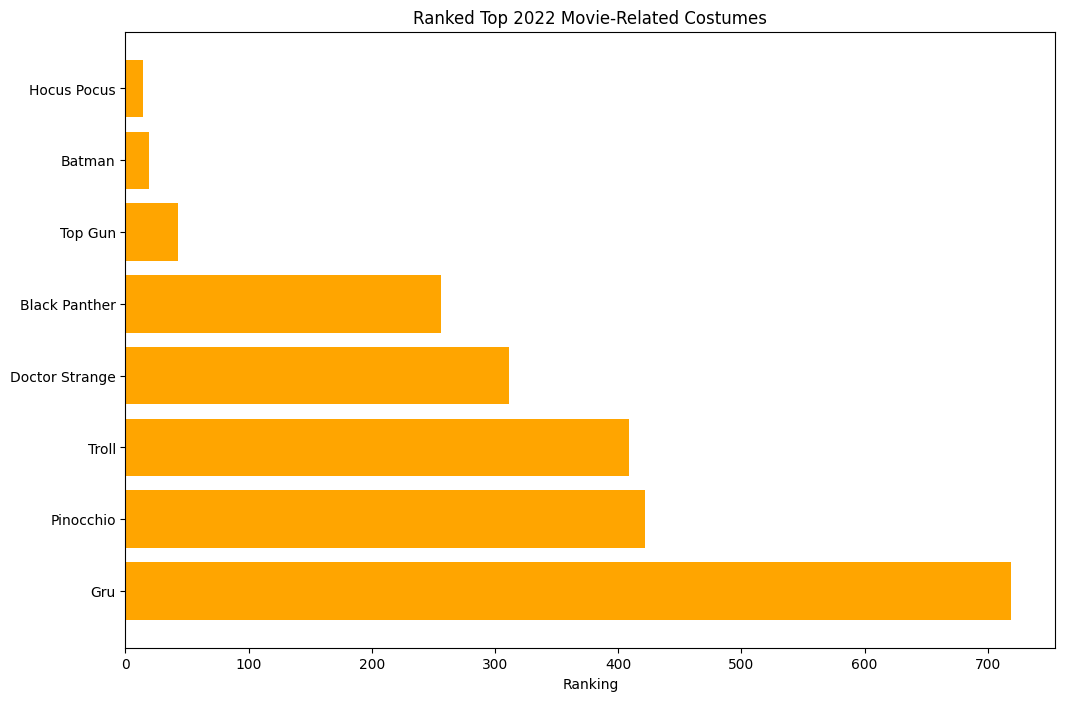

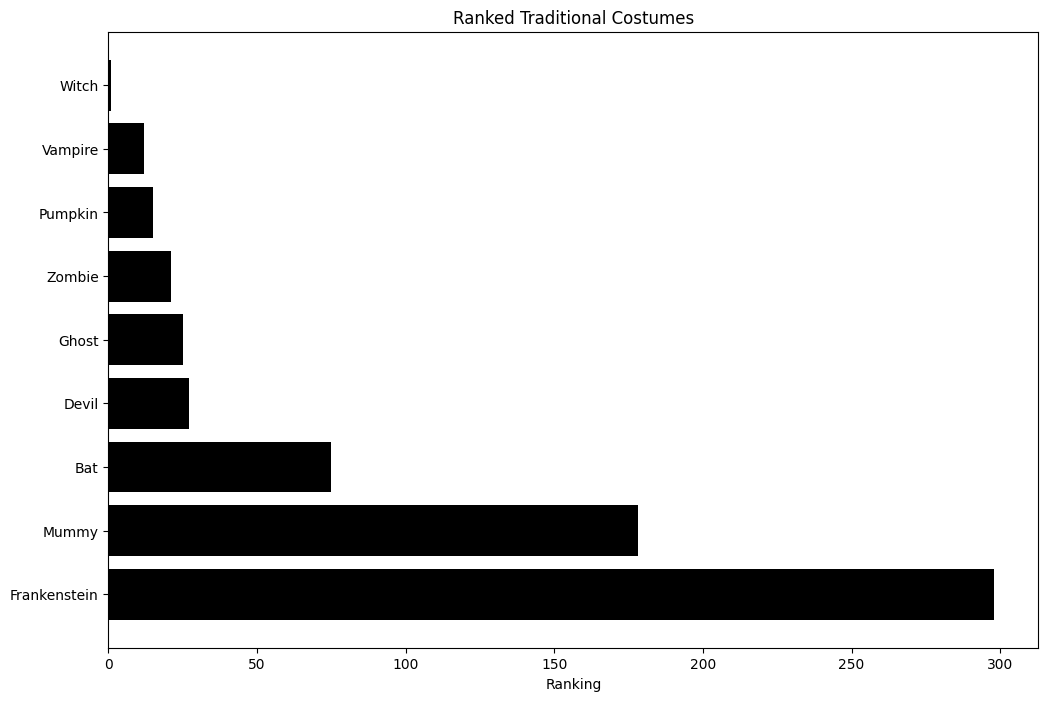

,Costume,Ranking,Is_2022_Movie_Related,Is_Traditional,Matched_Movies
0,Costume,NaN,False,False,[]
1,Witch,1.0,False,True,[]
2,Spider-Man,2.0,False,False,[]
3,Dinosaur,3.0,False,False,[]
4,Stranger Things,4.0,False,False,[]
...,...,...,...,...,...
860,The Dark Crystal Gelfling,860.0,False,False,[]
861,Vixen,861.0,False,False,[]
862,Where'S Waldo,862.0,False,False,[]
863,Spider-Gwen,863.0,False,False,[]


In [89]:
# Apply the above functions to each costume in the costume data using lambda function to condense all
costume_data['Is_2022_Movie_Related'] = costume_data['Costume'].apply(lambda x: is_movie_related(x, movie_keywords, traditional_costumes)[0])
costume_data['Matched_Movies'] = costume_data['Costume'].apply(lambda x: is_movie_related(x, movie_keywords, traditional_costumes)[1])
costume_data['Is_Traditional'] = costume_data['Costume'].apply(lambda x: x.lower() in traditional_costumes)

# Data Analysis, what is the average ranking, the higher the ranking the more popularity and likely occurrence
traditional_costumes_data = costume_data[costume_data['Is_Traditional'] == True] #sep. trad vs costume
movie_related_costumes_data = costume_data[costume_data['Is_2022_Movie_Related'] == True]
traditional_avg_rank = traditional_costumes_data['Ranking'].mean() #get the average rank of the traditional costumes
movie_related_avg_rank = movie_related_costumes_data['Ranking'].mean() #get the average rank of all the costumes that matched movies
print("Traditional Costume's Average Costume Ranking:", traditional_avg_rank)
print("Match 2022 Movie-Related Costumes Average Costume Ranking:",movie_related_avg_rank)

# Generate top 10 lists
top_movie = movie_related_costumes_data.nsmallest(10, 'Ranking') #only 8 movies from this year matched, which is okay. Realize lots of costumes match to movies, not made in 2022...
top_traditional = traditional_costumes_data.nsmallest(10, 'Ranking')

#plot the the top movie related costumes in rank (remember: the lower the number, the higher the rank)
plt.figure(figsize=(12, 8))
bars = plt.barh(top_movie['Costume'], top_movie['Ranking'], color='orange')
plt.gca().invert_yaxis()
plt.title('Ranked Top 2022 Movie-Related Costumes')
plt.xlabel('Ranking')
plt.show()

#Showing the 10 traditional costumes with rankings
plt.figure(figsize=(12, 8))
bars = plt.barh(top_traditional['Costume'], top_traditional['Ranking'], color='black')
plt.gca().invert_yaxis()
plt.title('Ranked Traditional Costumes')
plt.xlabel('Ranking')
plt.show()

# Display updated costume data to verify findings.
costume_data[['Costume', 'Ranking', 'Is_2022_Movie_Related', 'Is_Traditional', 'Matched_Movies']]


          Costume  Ranking  Popularity
0     Hocus Pocus     14.0      68.501
1          Batman     19.0     156.961
2         Top Gun     43.0     167.162
3   Black Panther    256.0     194.346
4  Doctor Strange    311.0     144.519
5           Troll    409.0      82.599
6       Pinocchio    422.0      63.372
7             Gru    719.0      98.931
Correlation between costume ranking and movie popularity: -0.35060998340915334


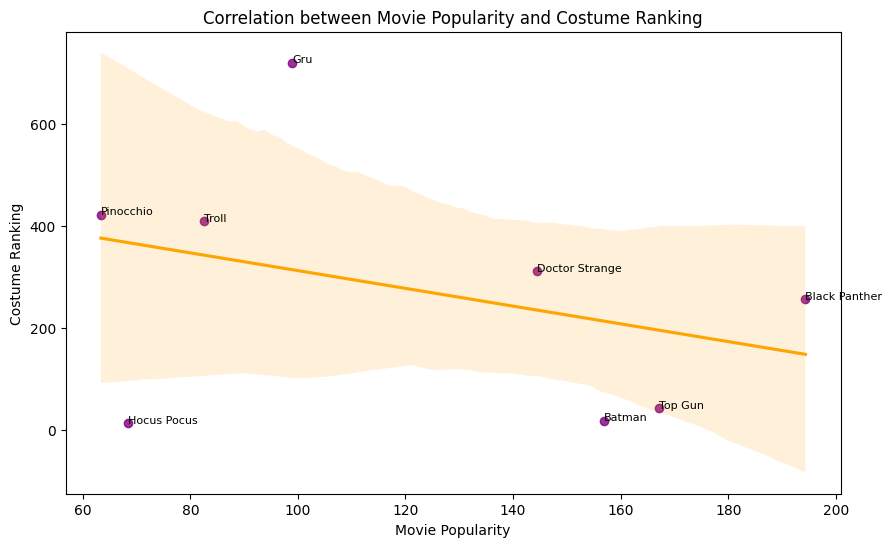

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
costume_data['Is_Traditional'] = costume_data['Costume'].apply(lambda x: x.lower() in traditional_costumes)

# For every costume, find the correlating rank and the popularity of he matched movie the character comes from
def merge_movie_costume_data(costume_data, movie_data):
  merged_data = []
  for index, row in costume_data.iterrows():
    if row['Is_2022_Movie_Related']:
      for movie in row['Matched_Movies']:
        matched_movie = movie_data[movie_data['title'] == movie]
        if not matched_movie.empty:
          movie_popularity = matched_movie['popularity'].values[0]
          merged_data.append({'Costume': row['Costume'], 'Ranking': row['Ranking'], 'Popularity': movie_popularity})
  return pd.DataFrame(merged_data)

merged_data = merge_movie_costume_data(costume_data, movie_data)
#check to see if this works
print(merged_data)

# See if there is a correlation between movie poipularity and costume ranking
correlation = merged_data['Ranking'].corr(merged_data['Popularity'])
print(f"Correlation between costume ranking and movie popularity: {correlation}")
# Correlation with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Popularity', y='Ranking', data=merged_data, scatter_kws={'color': 'purple'}, line_kws={'color': 'orange'})
plt.title('Correlation between Movie Popularity and Costume Ranking')
plt.xlabel('Movie Popularity')
plt.ylabel('Costume Ranking')
for i in range(len(merged_data)): #adding the label of the movies to the plot
  plt.text(merged_data['Popularity'].iloc[i], merged_data['Ranking'].iloc[i], merged_data['Costume'].iloc[i], fontsize=8)


#There is a moderate correlation between movie poplarity and costume ranking. The more popular a movie is the lower the ranking number (ie. the costume become more popular). No suprise there.

# The data is variabe however and doesnt fit the linear model well. There are not a lot of data points. This would be interesting to see over maybe a 5 year period to see if there is a stronger/weaker correlation with more data from more years.

<ipython-input-87-eb06cbcc3231>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traditional_costumes_data['Type'] = 'Traditional Costumes'
<ipython-input-87-eb06cbcc3231>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_related_costumes_data['Type'] = '2022 Movie-Related Costumes'
<ipython-input-87-eb06cbcc3231>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns

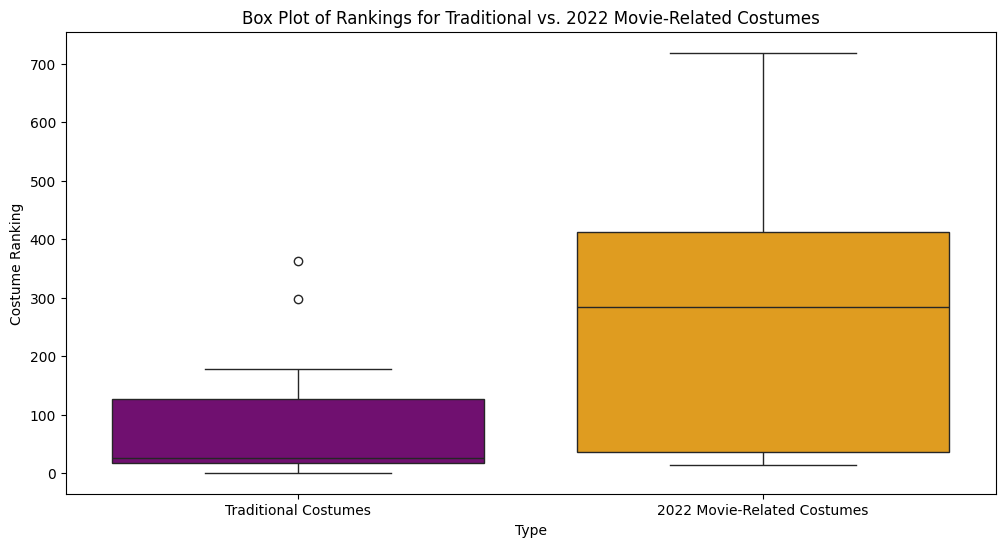

In [87]:
# Prepare the data for the box plot
traditional_costumes_data['Type'] = 'Traditional Costumes'
movie_related_costumes_data['Type'] = '2022 Movie-Related Costumes'
combined_data = pd.concat([traditional_costumes_data[['Ranking', 'Type']], movie_related_costumes_data[['Ranking', 'Type']]])

# Box Plot of Rankings for Traditional and 2022 Movie-Related Costumes
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Ranking', data=combined_data, palette=['purple', 'orange'])
plt.title('Box Plot of Rankings for Traditional vs. 2022 Movie-Related Costumes')
plt.ylabel('Costume Ranking')
plt.show()